In [197]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import re

In [209]:
# Model Opening
model_path = 'SIE'
model_ver = 'SIE_POS+FLUX'

if 'POS+FLUX' in model_ver:
    constraint = 'pos_flux'
elif 'POS' in model_ver:
    constraint = 'pos'


# Load the data
with open(model_path + '/' + model_ver + '_optresult' + '.dat', 'r') as file:
    opt_result = file.readlines()

opt_result

with open(model_path + '/' + constraint + '_point' + '.py', 'r') as file:
    py = file.readlines()

py

['#!/usr/bin/env python\n',
 'import glafic\n',
 '\n',
 "glafic.init(0.3, 0.7, -1.0, 0.7, 'SIE/SIE_POS+FLUX', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)\n",
 '\n',
 "glafic.set_secondary('chi2_splane 0', verb = 0)\n",
 "glafic.set_secondary('chi2_checknimg 0', verb = 0)\n",
 "glafic.set_secondary('chi2_restart   -1', verb = 0)\n",
 "glafic.set_secondary('chi2_usemag    1', verb = 0)\n",
 "glafic.set_secondary('hvary          0', verb = 0)\n",
 "glafic.set_secondary('ran_seed -122000', verb = 0)\n",
 '\n',
 'glafic.startup_setnum(1, 0, 1)\n',
 "glafic.set_lens(1, 'sie', 0.261343256161012, 1.57e+02,  20.80, 20.75, 0.12, -4.0, 0.0, 0.0)\n",
 'glafic.set_point(1, 1.0, 20.78, 20.78)\n',
 '\n',
 'glafic.setopt_lens(1, 0, 1, 1, 1, 1, 1, 0, 0)\n',
 'glafic.setopt_point(1, 0, 1, 1)\n',
 '\n',
 '# model_init needs to be done again whenever model parameters are changed\n',
 'glafic.model_init(verb = 0)\n',
 '\n',
 "glafic.readobs_point('/Users/ainsleylewis/Documents/Astronomy/IllustrisT

In [210]:
# Extract the line containing 'glafic.startup_setnum('
startup_setnum_line = next(line for line in py if 'glafic.startup_setnum(' in line)

set_point_line = next(line for line in py if 'glafic.set_point(' in line)

# Extract the first number inside the parentheses
extracted_value = int(re.search(r'glafic\.startup_setnum\((\d+)', startup_setnum_line).group(1))

print(extracted_value)

set_point = int(re.search(r'glafic\.set_point\((\d+)', set_point_line).group(1))

print(set_point)

1
1


In [211]:
# Model Values 
# Find the line containing 'lens   sie' in opt_result
lens_sie_line = next(line for line in reversed(opt_result) if 'lens   sie' in line)

print(lens_sie_line)

# Extract the values from the line
lens_sie_values = lens_sie_line.split()[2:]
lens_sie_values = [str(value) for value in lens_sie_values]
lens_sie_values

# Find the line containing 'glafic.set_point' in opt_result
set_point_line = next(line for line in reversed(opt_result) if 'point' in line)

print(set_point_line)

# Extract the values from the line
set_point_values = set_point_line.split()[1:]
set_point_values = [str(value) for value in set_point_values]
set_point_values


lens   sie     0.2613  1.579763e+02  2.080977e+01  2.075960e+01  1.271712e-01 -4.438612e+00  0.000000e+00  0.000000e+00 

point  1.0000  2.081284e+01  2.078037e+01 



['1.0000', '2.081284e+01', '2.078037e+01']

In [212]:
name = "'" + model_path + '/' + model_ver + "'"
name

"'SIE/SIE_POS+FLUX'"

In [213]:
r1 = 0.03
r2 = 0.8
n = 1000
len_num = 1

# Read the existing file contents
with open('kappa_glafic.py', 'r') as f:
    py = f.readlines()

# Update values and write back
with open('kappa_glafic.py', 'w') as glafic_file:
    for line in py:
        if 'glafic.set_lens(' in line:
            print('Found glafic.set_lens')
            line = f"glafic.set_lens(1, 'sie', {lens_sie_values[0]}, {lens_sie_values[1]}, {lens_sie_values[2]}, {lens_sie_values[3]}, {lens_sie_values[4]}, {lens_sie_values[5]}, {lens_sie_values[6]}, {lens_sie_values[7]})\n"
        elif 'glafic.init(' in line:
            line = f"glafic.init(0.3, 0.7, -1.0, 0.7, {name}, 20.0, 20.0, 21.56, 21.56, 0.01, 0.01, 1, verb = 0)\n"
        elif 'glafic.set_point(' in line:
            print('Found glafic.set_point')
            # Ensure values are up to date
            if set_point_values is not None and len(set_point_values) == 3:
                line = f"glafic.set_point(1, 1.000, {set_point_values[0]}, {set_point_values[1]})\n"
            else:
                print("set_point_values is not set correctly.")
        elif 'glafic.kapparad(' in line:
            print('Found glafic.kapparad')
            line = f"glafic.kapparad({set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]}, {r1}, {r2}, {n}, {len_num})\n"
        elif 'glafic.kappacum(' in line:
            print('Found glafic.kappacum')
            line = f"glafic.kappacum({set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]}, {r1}, {r2}, {n}, {len_num})\n"
        glafic_file.write(line)

Found glafic.set_lens
Found glafic.set_point
Found glafic.kapparad
Found glafic.kappacum


In [214]:
%run kappa_glafic.py

######## computing radial profile of kappa
 zs = 1.000000e+00,  lens id = 1,  step = 1000
 center = (2.081284e+01, 2.078037e+01),  range = [3.000000e-02, 8.000000e-01]
 output file name = SIE/SIE_POS+FLUX_kaprad.dat

3.000000e-02 9.546861e+00
3.077000e-02 9.212837e+00
3.154000e-02 8.905527e+00
3.231000e-02 8.621985e+00
3.308000e-02 8.358857e+00
3.385000e-02 8.113727e+00
3.462000e-02 7.887086e+00
3.539000e-02 7.671726e+00
3.616000e-02 7.469325e+00
3.693000e-02 7.278611e+00
3.770000e-02 7.098491e+00
3.847000e-02 6.928014e+00
3.924000e-02 6.766352e+00
4.001000e-02 6.612775e+00
4.078000e-02 6.466638e+00
4.155000e-02 6.327369e+00
4.232000e-02 6.194456e+00
4.309000e-02 6.067442e+00
4.386000e-02 5.945913e+00
4.463000e-02 5.829498e+00
4.540000e-02 5.717859e+00
4.617000e-02 5.610689e+00
4.694000e-02 5.507710e+00
4.771000e-02 5.408665e+00
4.848000e-02 5.313321e+00
4.925000e-02 5.221464e+00
5.002000e-02 5.132895e+00
5.079000e-02 5.047432e+00
5.156000e-02 4.964906e+00
5.233000e-02 4.885162e+00
5.3

600e-01 1.872645e+00
2.602300e-01 1.867338e+00
2.610000e-01 1.862070e+00
2.617700e-01 1.856843e+00
2.625400e-01 1.851656e+00
2.633100e-01 1.846508e+00
2.640800e-01 1.841399e+00
2.648500e-01 1.836326e+00
2.656200e-01 1.831295e+00
2.663900e-01 1.826302e+00
2.671600e-01 1.821348e+00
2.679300e-01 1.816431e+00
2.687000e-01 1.811553e+00
2.694700e-01 1.806713e+00
2.702400e-01 1.801910e+00
2.710100e-01 1.797145e+00
2.717800e-01 1.792417e+00
2.725500e-01 1.787727e+00
2.733200e-01 1.783074e+00
2.740900e-01 1.778459e+00
2.748600e-01 1.773880e+00
2.756300e-01 1.769340e+00
2.764000e-01 1.764836e+00
2.771700e-01 1.760371e+00
2.779400e-01 1.755942e+00
2.787100e-01 1.751552e+00
2.794800e-01 1.747199e+00
2.802500e-01 1.742884e+00
2.810200e-01 1.738603e+00
2.817900e-01 1.734365e+00
2.825600e-01 1.730166e+00
2.833300e-01 1.726006e+00
2.841000e-01 1.721886e+00
2.848700e-01 1.717806e+00
2.856400e-01 1.713767e+00
2.864100e-01 1.709775e+00
2.871800e-01 1.705820e+00
2.879500e-01 1.701909e+00
2.887200e-01 1.69

In [215]:
# Math for img positions 
x_cent = float(set_point_values[1])
y_cent = float(set_point_values[2])
print(x_cent, y_cent)

# Predicted Positions 
pred_columns = ['x', 'y', 'mag', 'err']
pred_file = model_path + '/' + model_ver + '_point.dat'
pred = pd.read_fwf(pred_file, sep=' ', header=None, skiprows=1, names=pred_columns)

pred_rad = np.sqrt((pred['x'] - x_cent)**2 + (pred['y'] - y_cent)**2)
pred['rad'] = pred_rad
pred


inset_x_lim_l = min(pred['rad']) - 0.01
inset_x_lim_u = max(pred['rad']) + 0.01

20.81284 20.78037


In [216]:
# Plot profile 
# Load the data
columns = ['r', 'kappa']
data = pd.read_csv( model_path + '/' + model_ver + '_kaprad.dat', sep=' ', header=None, names=columns)
data2 = pd.read_csv(model_path + '/' + model_ver + '_kapcum.dat', sep=' ', header=None, names=columns)

In [217]:
# Percet Height

kap_pred = [data2.loc[(data2['r'] - rad).abs().idxmin(), 'kappa'] for rad in pred['rad']]
kap_max = max(data2['kappa'])

percent_height = [kap/kap_max for kap in kap_pred]
percent_height = [ph + 0.001 for ph in percent_height]

inset_percent_height = [ph + 0.68 for ph in percent_height]


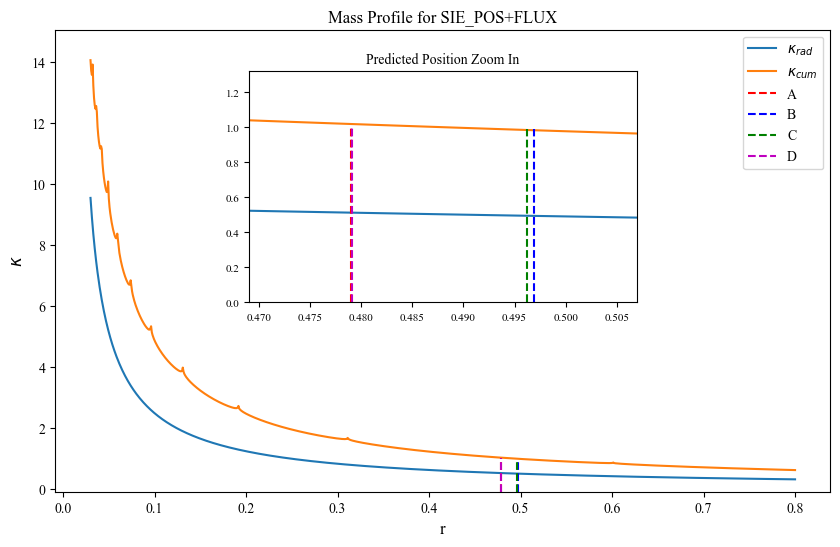

In [218]:
plt.figure(figsize=(10, 6))
plt.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
plt.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
plt.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=percent_height[0], ymin=0)
plt.axvline(x=pred['rad'][1], color='b', linestyle='--', label='B', ymax=percent_height[1], ymin=0)
plt.axvline(x=pred['rad'][2], color='g', linestyle='--', label='C', ymax=percent_height[2], ymin=0)
plt.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=percent_height[3], ymin=0)
plt.xlabel('r', fontsize=12)
plt.ylabel('$\kappa$', fontsize=12)
plt.title('Mass Profile for ' + model_ver)
plt.ylim(-0.1, max(data2['kappa']) + 1)
plt.legend()

# Add inset plot
ax_inset = inset_axes(plt.gca(), width="50%", height="50%", loc="upper center", borderpad=3)
ax_inset.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
ax_inset.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
ax_inset.set_xlim(inset_x_lim_l, inset_x_lim_u)  # Adjust the x-axis range for the inset
ax_inset.set_ylim(0, max(kap_pred) + 0.3)  # Adjust the y-axis range for the inset
ax_inset.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=inset_percent_height[0], ymin=0)
ax_inset.axvline(x=pred['rad'][1], color='b', linestyle='--', label='C', ymax=inset_percent_height[1], ymin=0)
ax_inset.axvline(x=pred['rad'][2], color='g', linestyle='--', label='B', ymax=inset_percent_height[2], ymin=0)
ax_inset.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=inset_percent_height[3], ymin=0)
ax_inset.set_title('Predicted Position Zoom In', fontsize=10)
ax_inset.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('Mass Profiles/' + model_ver + '_mass_profile.png')
plt.show()

In [ ]:
# Shear Plots
